# Install a pip packages in the current Jupyter kernel

In [1]:
'''
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install Image
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install tqdm
'''

'\nimport sys\n!{sys.executable} -m pip install numpy\n!{sys.executable} -m pip install pandas\n!{sys.executable} -m pip install scipy\n!{sys.executable} -m pip install Image\n!{sys.executable} -m pip install matplotlib\n!{sys.executable} -m pip install scikit-learn\n!{sys.executable} -m pip install opencv-python\n'

# Make all imports

In [2]:
import os
import cv2 as cv
from tqdm import tqdm
from PIL import Image
from skimage import measure

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import spectral_clustering
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from scipy.ndimage.interpolation import zoom
from scipy import ndimage
from scipy import misc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# !!! ----------------------------------------------- !!!
path = 'C:/Users/Maksim/2ia kalibrovka/'  # путь к фоткам калибров.
files = os.listdir(path)    # print(f'!!!path = {path}')
path_kalibrovka = 'C:/Users/Maksim/2ia kalibrovka/'
files_kalibrovka = os.listdir(path_kalibrovka)
checkPhotosTurn = 0      # 1 - ПОВОРАЧИВАТЬ ФОТКИ, 0 - НЕТ (ВПРАВО НА 90)
n_of_clusters = 2        # количество кластеров
# !!! ----------------------------------------------- !!!

In [8]:
images = filter(lambda x: x.endswith('.jpg'), files)
# print(f'files = {files}, len =  {len(files)}')
for i in tqdm(range(len(files))):
    im = Image.open(f'{path}/{files[i]}')   # print(f'path = {self.photos_folder}/{image}')
    #image = image[i].split('.')[0]
    # print(f'{path}{files[i]}')
    if checkPhotosTurn == 1:
        im2 = im.transpose(Image.ROTATE_270)
        im2.save(path + files[i], "JPEG")

## Input all images in one list of images names
1) First, we take dataset of images with 10 centimeters from the object.

2) We took images with 2, 3, 4, 6, 7, 8, 9, 11, 12 millimeters of electrolit in '.png' format.

#### Make a relative path to images

In [9]:
   
def images_names():
    dict_of_names = {}
    for ml in range(1, len(files)+1, 1):
        image = files[ml-1]
        dict_of_names[ml] = image
    return dict_of_names

# !!!---------------------------------------------------
step = 1   # !! ЗАДАЁМ ШАГ КАЛИБРОВОЧНОГО ГРАФИКА !! # 
# !!!---------------------------------------------------
train_images_names = images_names()
# print(train_images_names)
low_level = 1
high_level = len(train_images_names.items())

##### Folders information
- 'Dataset_10_cm_png': contain images from 2 to 12 ml;
- 'Dataset_15_cm_png': contain images from 3 to 12 ml;

### Function to graph an images inside the Notebook

In [10]:
def graph_an_image(image, h=8, **kwargs):
    '''
    Function graph_an_image plot an image inside of Notebook
    '''
    y = image.shape[0]
    x = image.shape[1]
    w = (y / x) * h
    plt.figure(figsize=(w, h))
    plt.imshow(image, interpolation="none", **kwargs)
    plt.axis('off')

#### Graph all dataset, names of files and images

In [11]:
!pip install tqdm

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


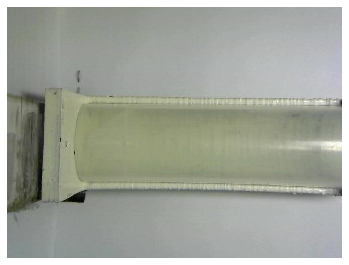

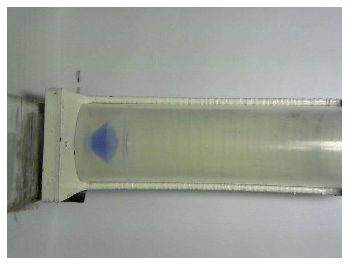

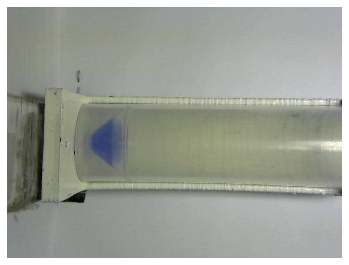

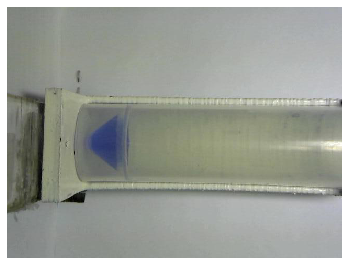

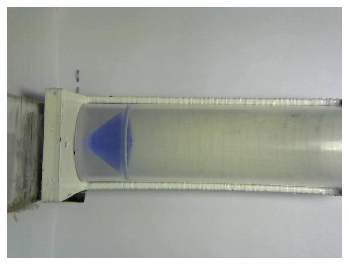

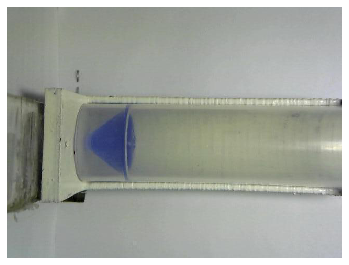

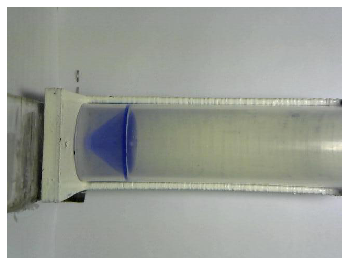

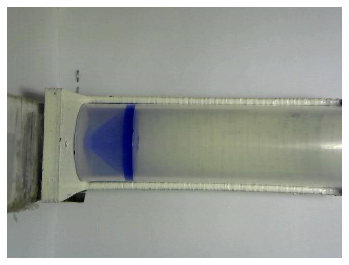

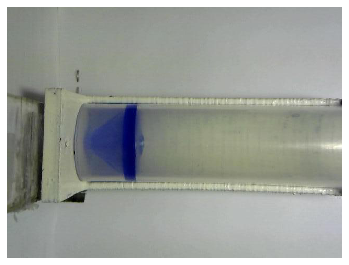

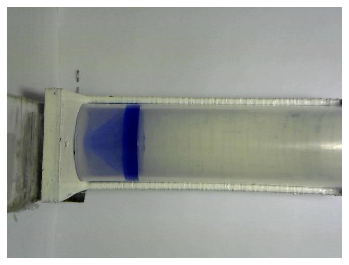

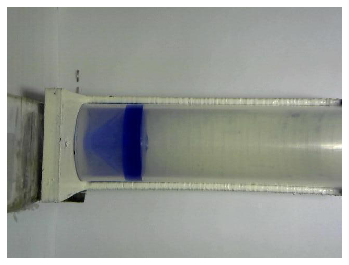

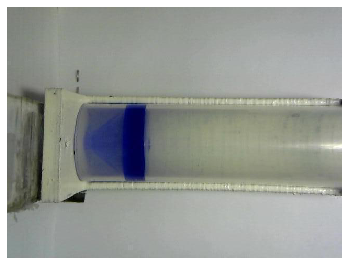

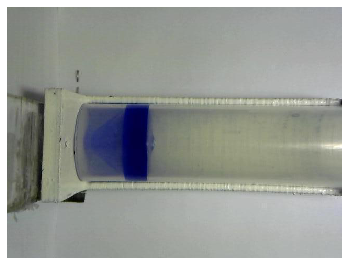

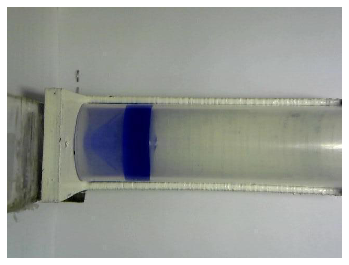

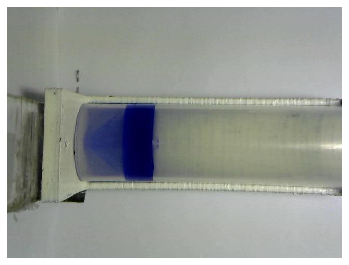

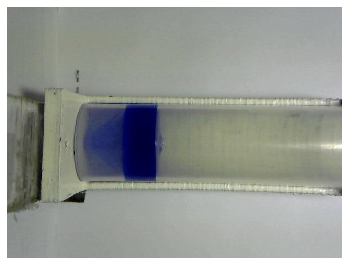

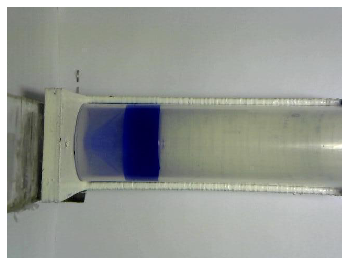

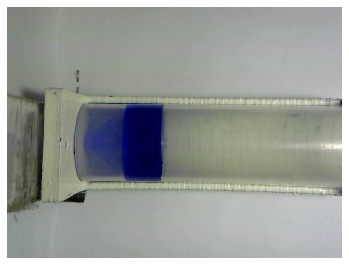

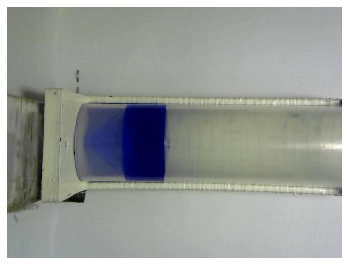

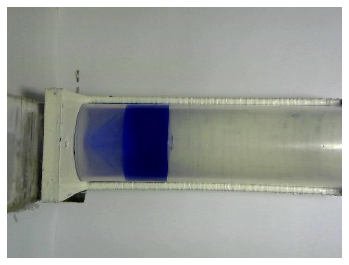

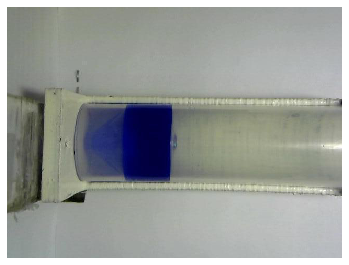

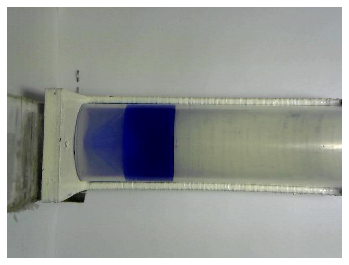

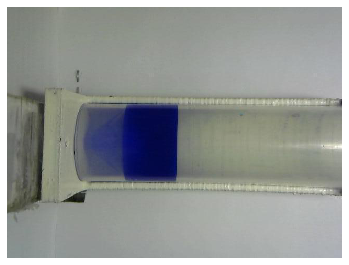

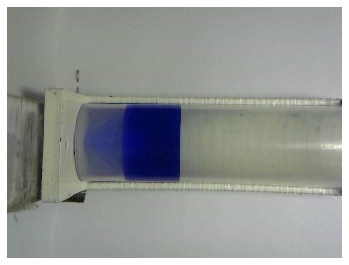

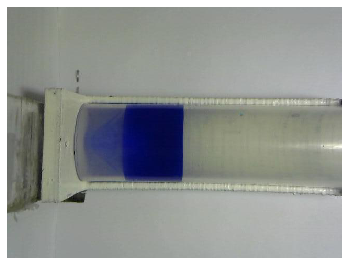

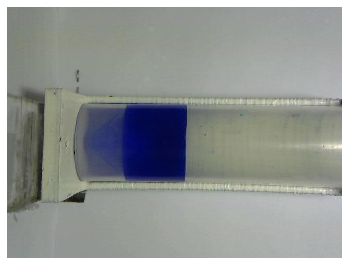

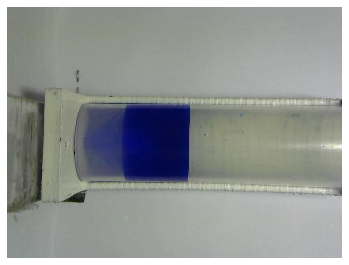

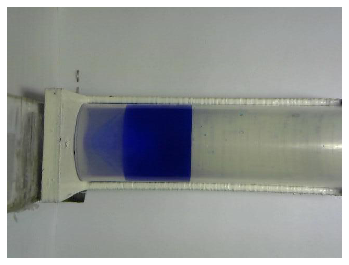

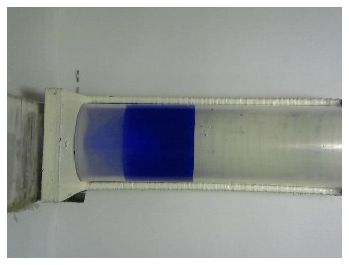

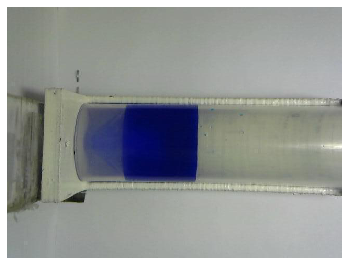

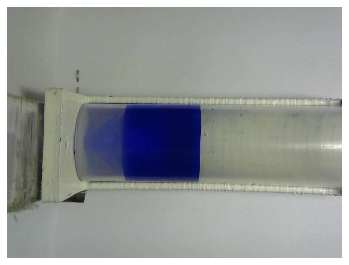

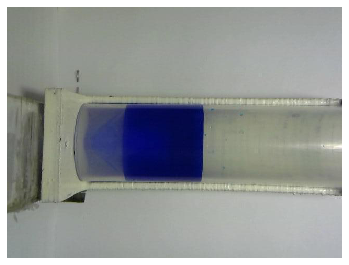

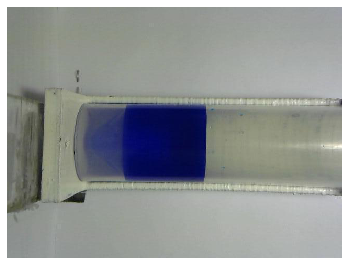

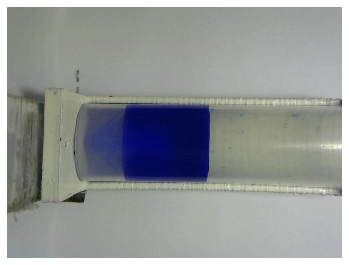

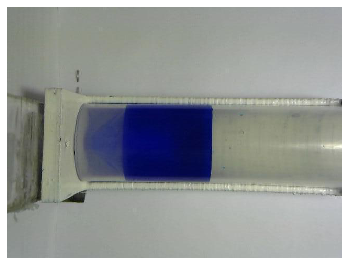

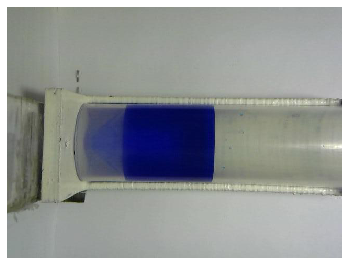

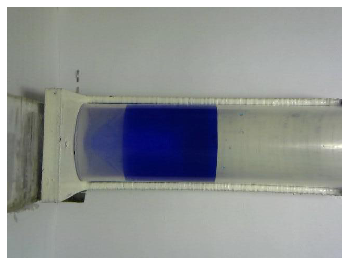

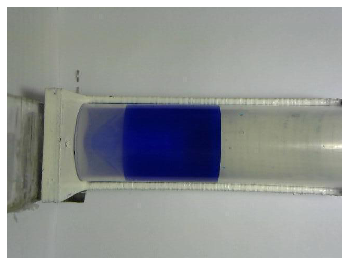

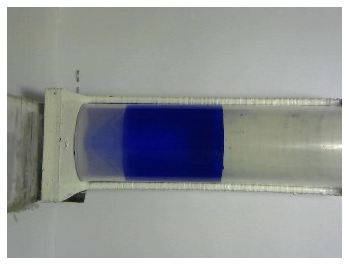

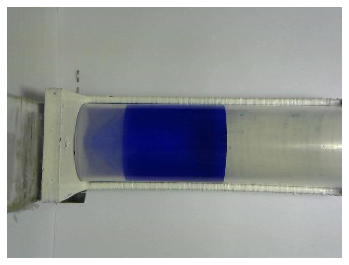

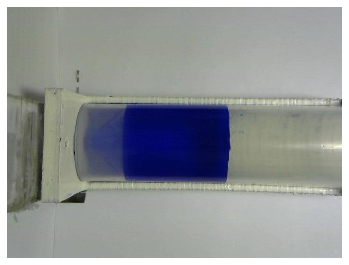

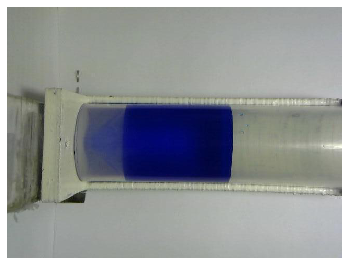

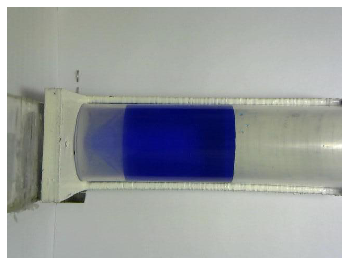

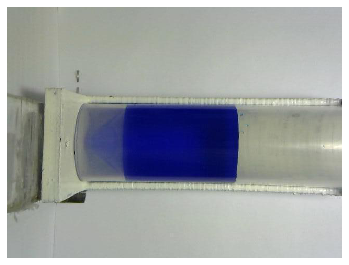

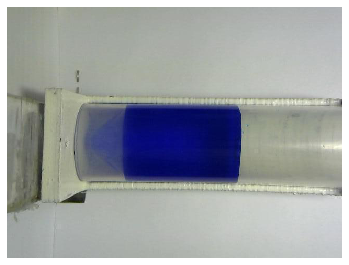

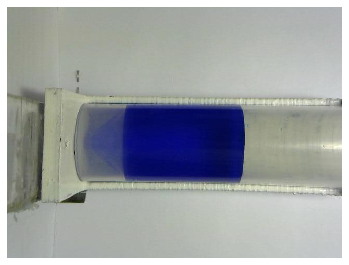

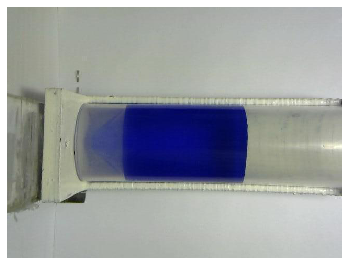

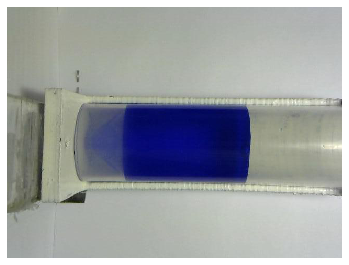

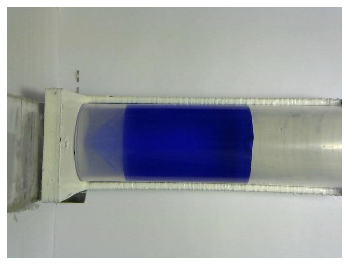

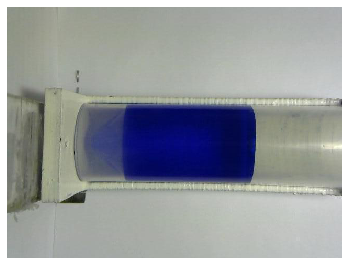

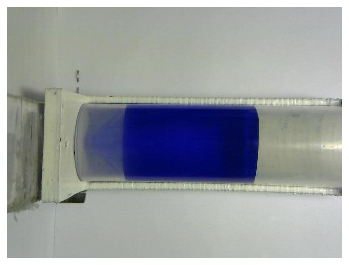

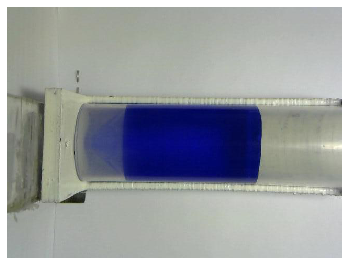

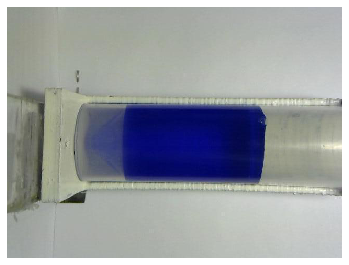

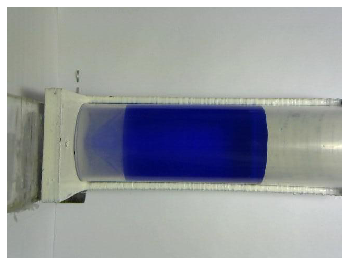

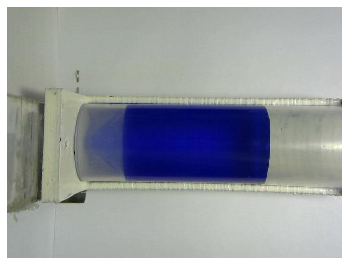

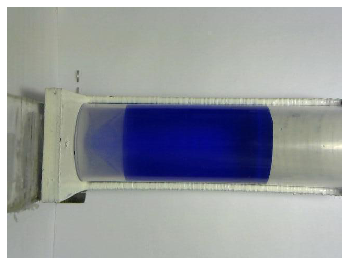

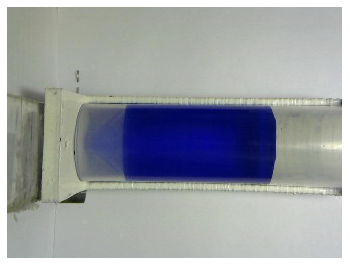

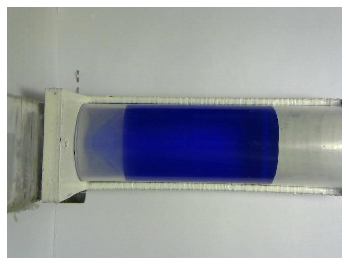

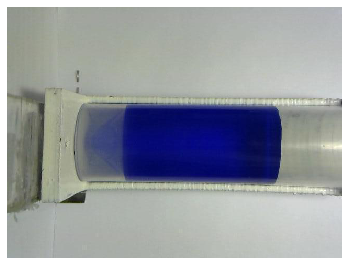

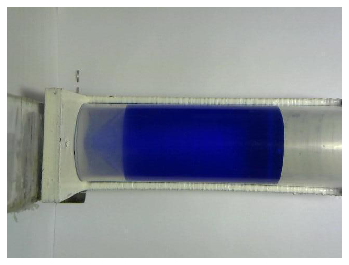

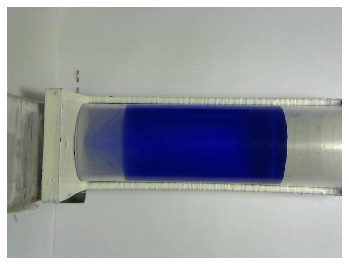

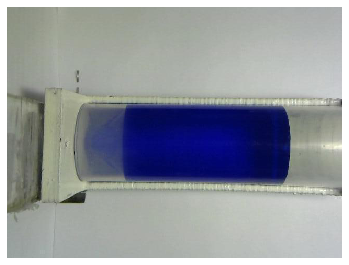

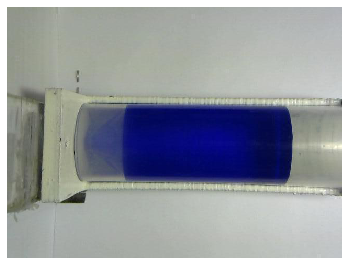

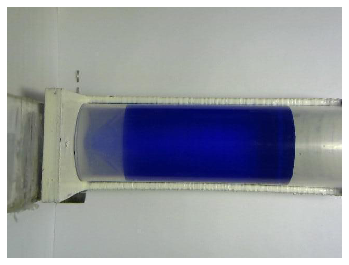

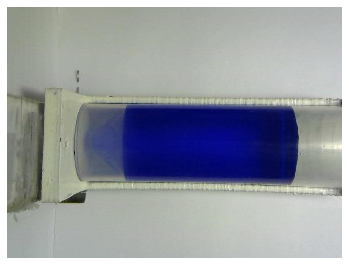

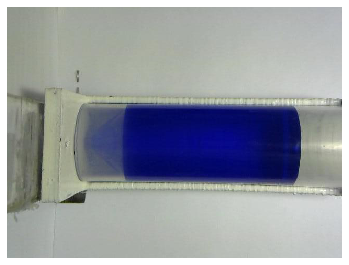

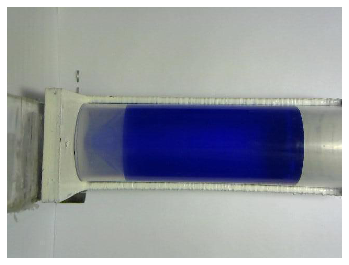

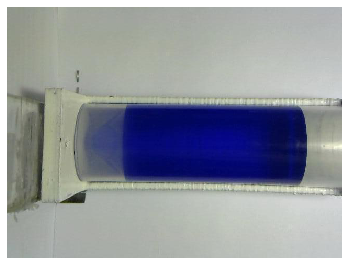

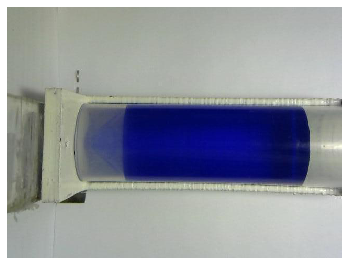

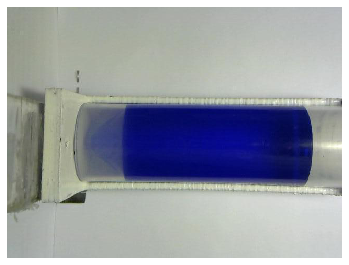

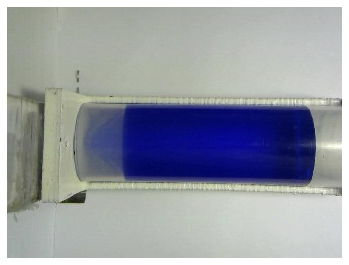

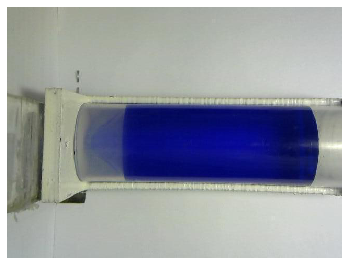

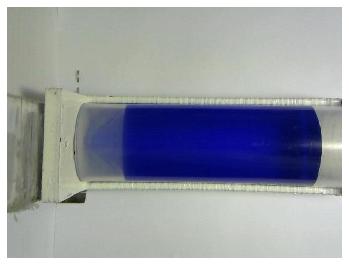

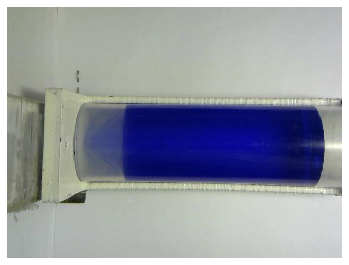

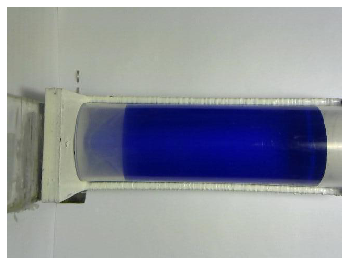

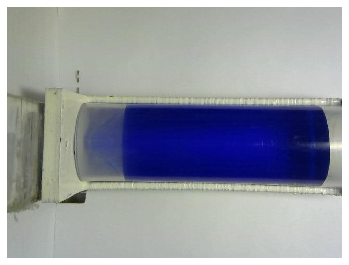

In [12]:
for mm, image in train_images_names.items():
    sample = train_images_names[mm]
    # print(sample)
    image = plt.imread(path + sample)
    # print(image.shape)
    graph_an_image(image)

### Graph levels of intensity for original image

(0, 256)

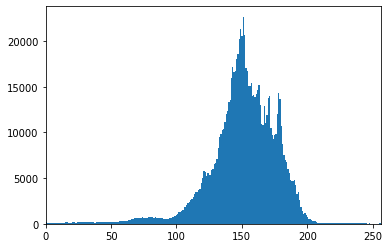

In [13]:
# Take for example image with 8mm level
example_image = train_images_names[1]

image_test = plt.imread(path + example_image,0)
fig, ax = plt.subplots(1, 1)
ax.hist(image_test.ravel(), 255, range=[0, 256]) # bins=32 
ax.set_xlim(0, 256)

So, we can see from the diagram that there are a 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


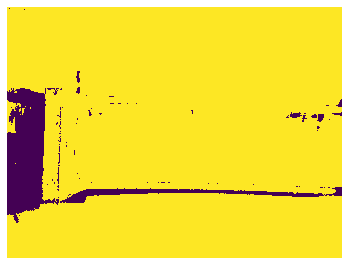

In [14]:
# convert color image to black and white
'''
image_file = Image.open(example_image)                  # open colour image
image_file = image_file.convert('1')                    # convert image to black and white
image_file.save('example_image_gray.png')               # save example_image_gray.png
image_file_gray = Image.open('example_image_gray.png')  # open colour image
'''

# convert color image to black and white use of a pillow without smoothing
'''
col = Image.open(example_image)
gry = col.convert('L')
grarray = np.asarray(gry)
bw = (grarray > grarray.mean()) * 255
#graph_an_image(bw)
'''

# convert color image to black and white use of a pillow without smoothing
image_file = Image.open(path + example_image) # open color image
image_file = image_file.convert('1', dither=Image.NONE) # convert image to black and white
image_file.save('example_image_gray.png')
example_image_gray = plt.imread('example_image_gray.png',0) 
#image_test = plt.imread(example_image,0)
gry = Image.open('example_image_gray.png') # open color image
grarray = np.asarray(gry)
example_image_gray = (grarray > grarray.mean()) * 255
graph_an_image(example_image_gray)
print(example_image_gray)

### Graph levels of intensity for gray image (example_image_gray)

(-10, 260)

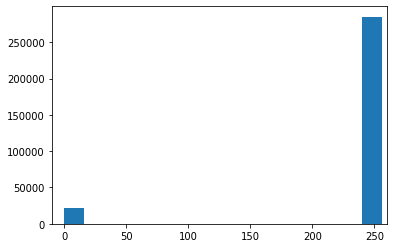

In [15]:
fig, ax = plt.subplots(1, 1)
ax.hist(example_image_gray.ravel(), bins=16, range=[0, 256])
ax.set_xlim(-10, 260)

### Find Distortion / Number of clusters using Elbow Method

In [16]:
def elbow_method(image):
    '''
    Function plot and take the best number of clusters
    '''
    X = image[0]
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

Use Elbow Method to see optimal number of clusters

Graph clusters curve for some test color image  

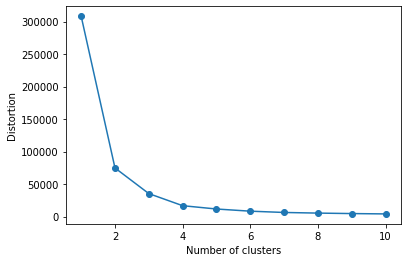

In [17]:
image_test = plt.imread(path + train_images_names[1])
elbow_method(image_test)

#### Graph clusters curve for gray image

In [18]:
#elbow_method(image_file_gray)

### K-means clustering function

In [19]:
def kmeans_clustering(img, n=n_of_clusters):
    '''
    K-means clustering function
    '''
    im_small = zoom(img, (0.2,0.2,1))
    h,w = im_small.shape[:2]
    im_small_long = im_small.reshape((h * w, 3))
    im_small_wide = im_small_long.reshape((h,w,3))
    km = KMeans(n_clusters=n)
    km.fit(im_small_long)
    cc = km.cluster_centers_.astype(np.uint8)
    out = np.asarray([cc[i] for i in km.labels_]).reshape((h,w,3))
    
    return [km, h, w]

### Function to select individual contours in the image

In [20]:
def segmentation(km, h, w):
    '''
    Select individual contours in the image
    '''
    seg = np.asarray([(1 if i == 1 else 0)
                      for i in km.labels_]).reshape((h,w))
    contours = measure.find_contours(seg, 0.5, fully_connected="high")
    simplified_contours = [measure.approximate_polygon(c, tolerance=4) for c in contours]
    
    return contours

### Function to graph found clasters

In [21]:
def graph_clasters(contours):
    '''
    Function to graph found clasters
    '''
    plt.figure(figsize=(5,10))
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.ylim(h,0)
    plt.axes().set_aspect('equal')

## Get clusters for all the images in dataset

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

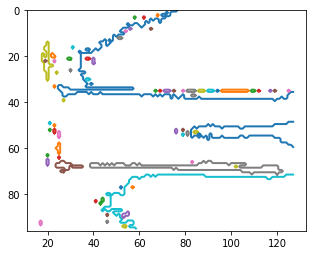

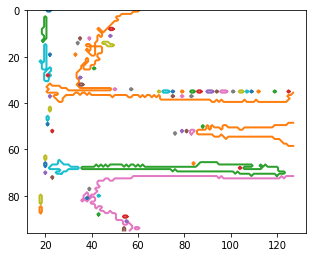

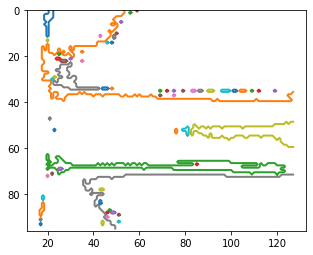

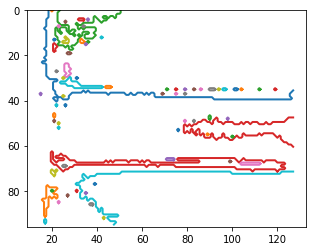

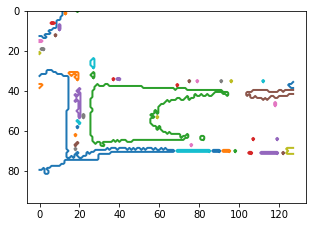

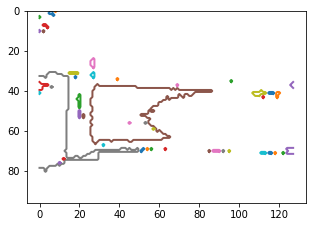

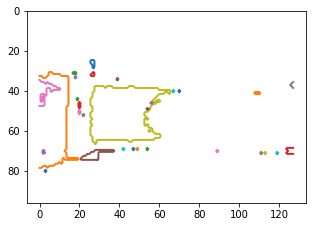

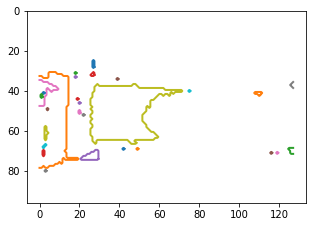

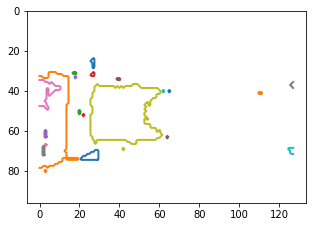

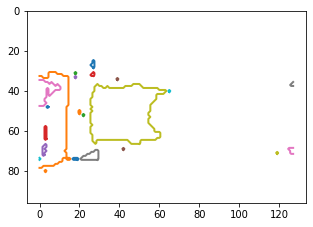

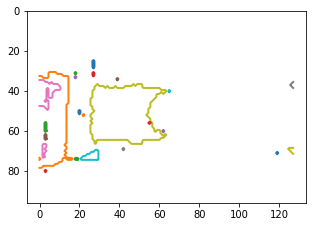

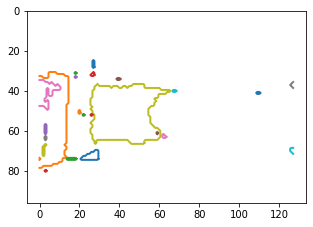

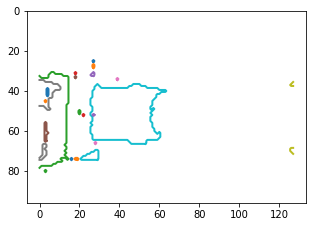

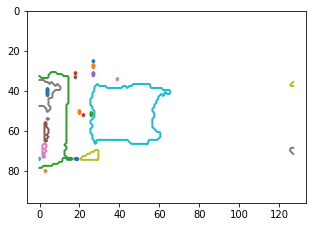

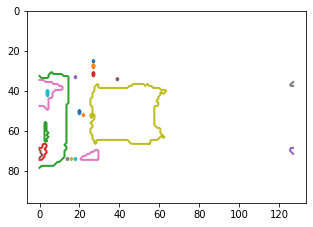

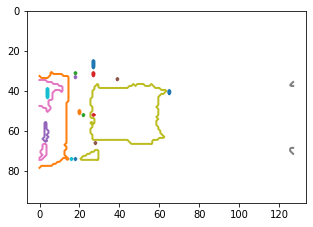

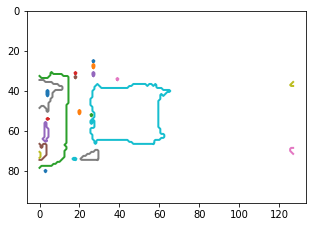

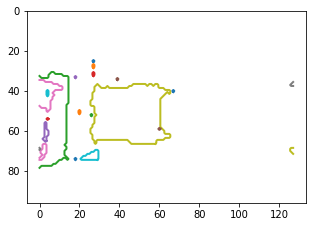

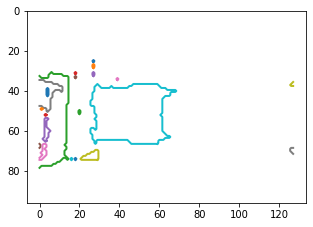

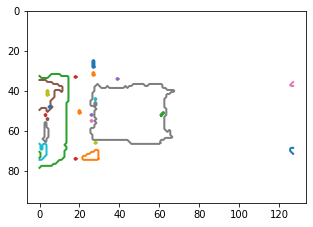

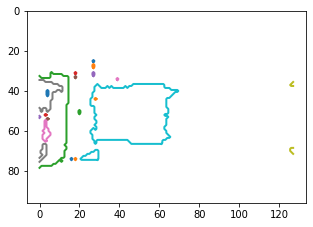

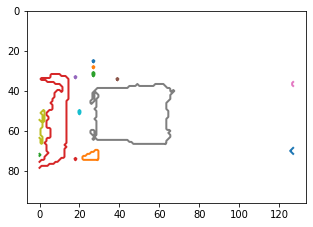

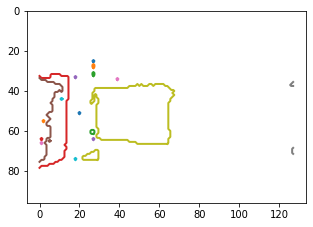

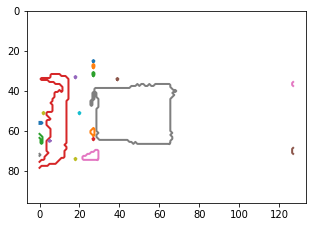

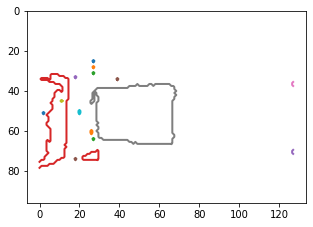

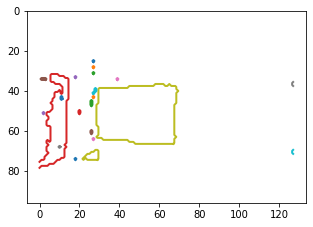

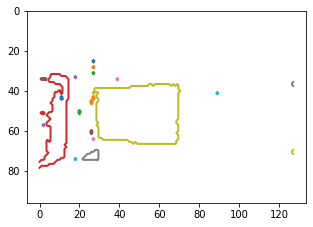

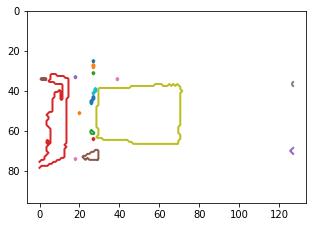

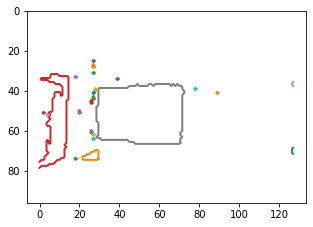

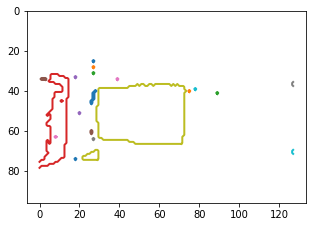

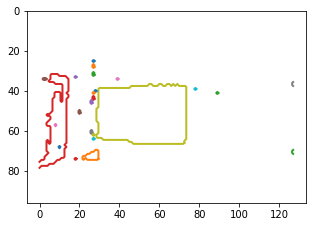

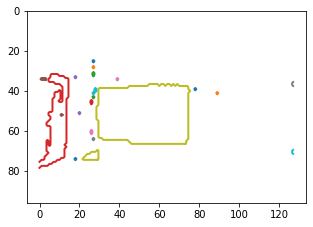

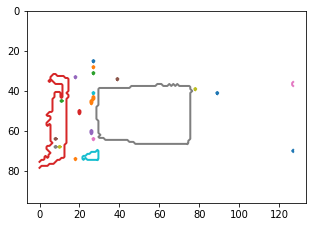

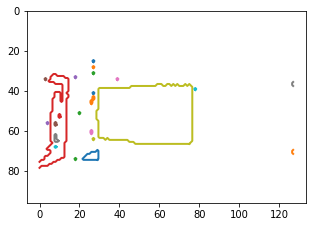

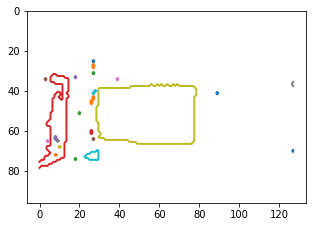

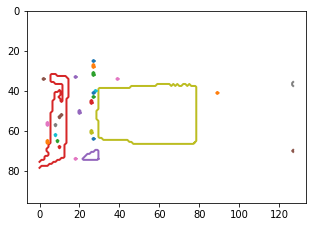

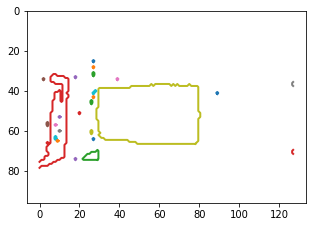

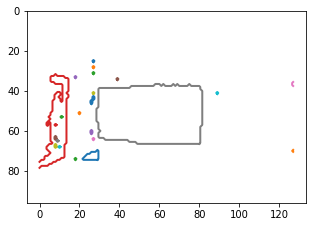

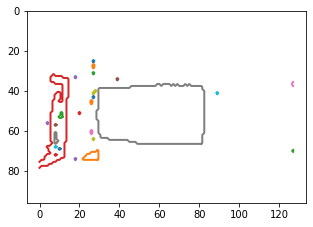

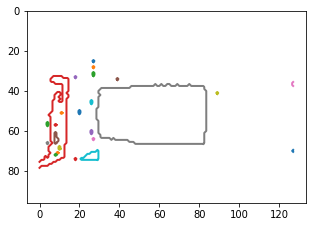

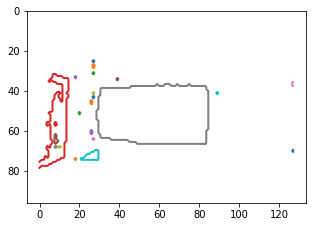

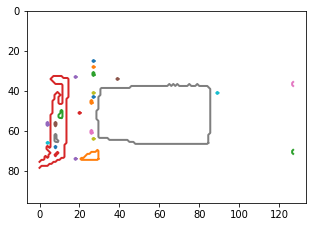

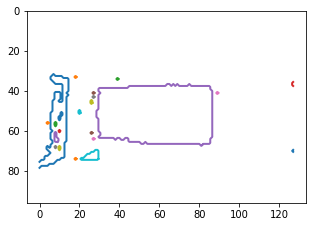

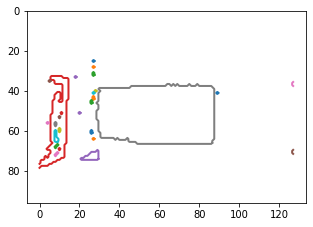

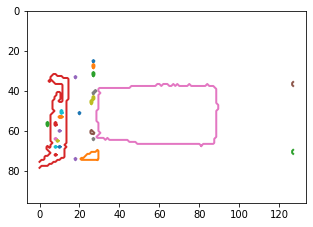

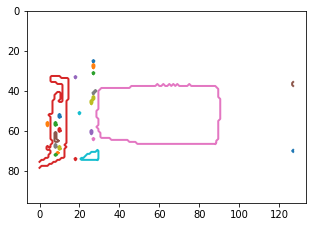

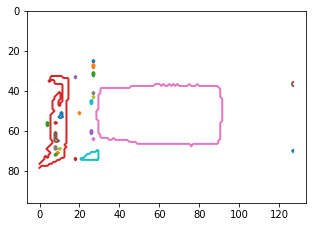

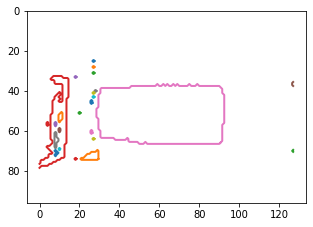

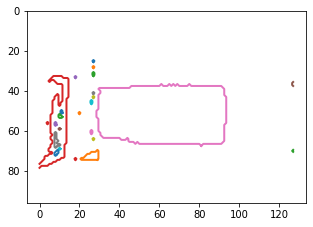

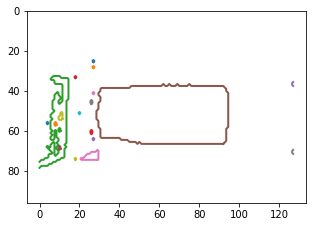

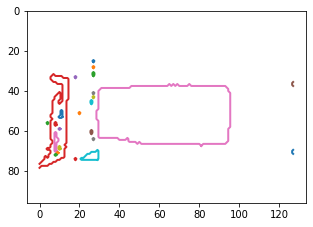

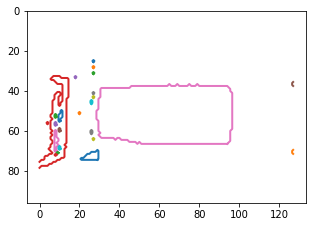

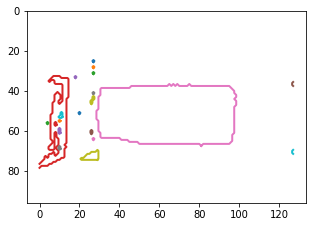

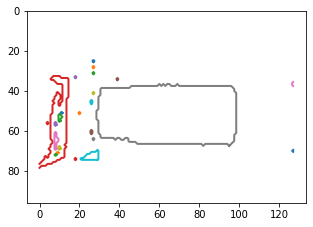

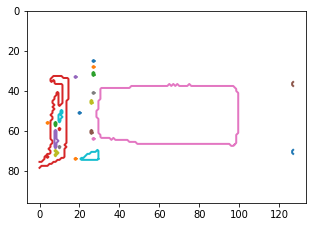

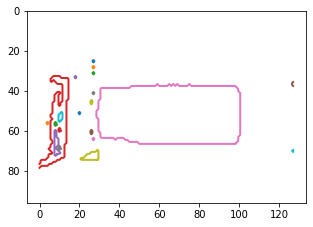

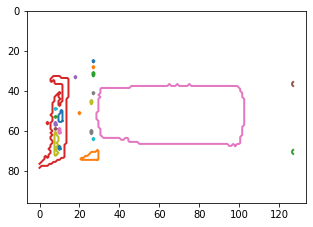

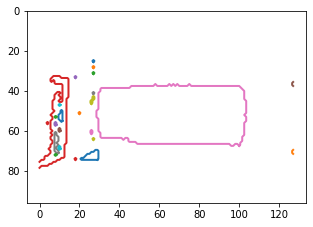

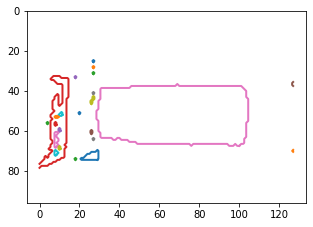

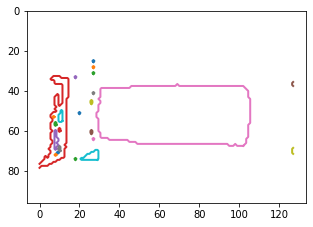

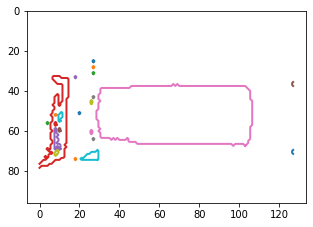

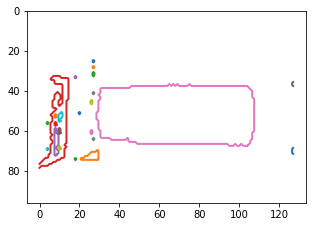

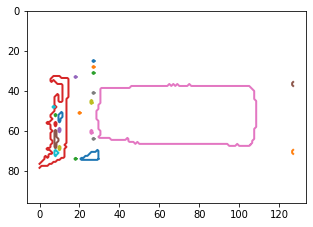

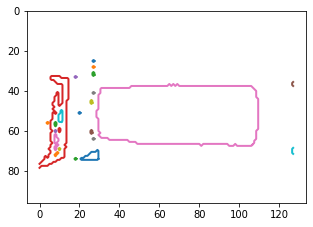

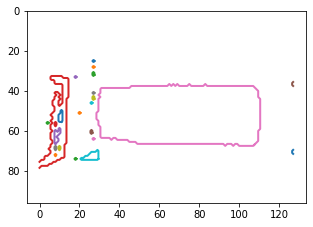

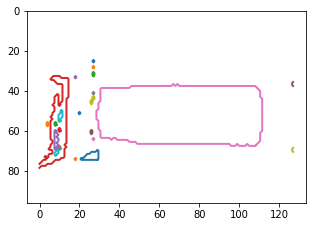

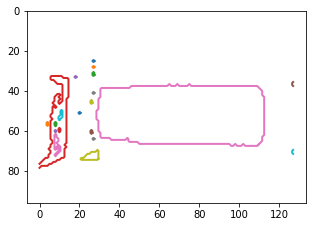

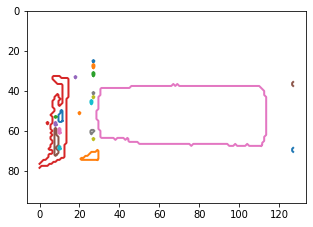

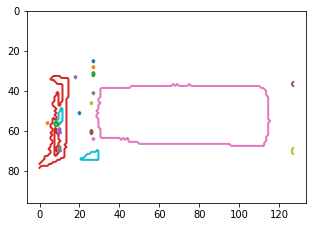

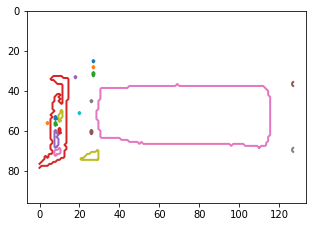

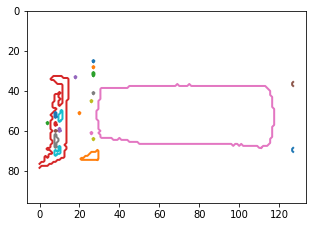

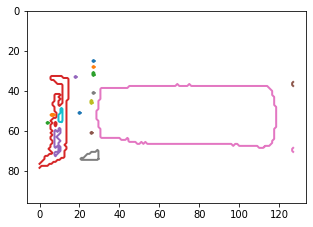

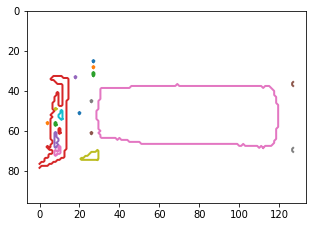

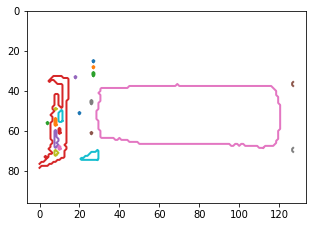

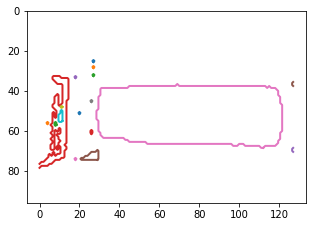

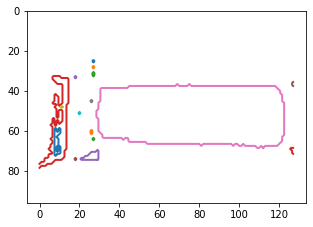

In [22]:
contours_of_images = {}
for mm, image in train_images_names.items():
    '''
    Get clusters for all the images in dataset
    '''
    sample = train_images_names[mm]
    image = plt.imread(path + sample)
    km, h, w = kmeans_clustering(image, n=n_of_clusters)
    seg = segmentation(km, h, w)
    contours_of_images[mm] = seg
    graph_clasters(seg)

### Find the level cluster

In [23]:
def find_segment(contours):
    '''
    Take the cluster of fluid level for 12 mm image
    '''
    segment = 0
    max = 0
    for contour in contours:
        if len(contour) > max:
            max = len(contour)
            segment = contour
    
    return segment

### Calculating delta coefficient

In [24]:
def find_delta(segment, images, i):
    '''
    Calculating delta coefficient for 12 mm image
    '''
    min = 1000000
    max = 0

    for seg in segment:
        if seg[0] > max:
            max = seg[0]
        if seg[0] < min:
            min = seg[0]

    #print('Image is ', images[i])

    delta = max - min
    coeff = i /  delta
    # print('Level is ' + str(delta * coeff) + ' mm.')
    # print(coeff)
    
    return coeff, delta

### Calculating delta coefficients for all images

In [25]:
delta_coeffs = {}
for mm, contours in contours_of_images.items():
    segment = find_segment(contours)
    coeff, delta = find_delta(segment, train_images_names, mm)
    delta_coeffs[mm] = coeff
# delta_coeffs

In [26]:
X = []
y = []
for i in range(low_level, high_level+1, step):
    X.append(i)
    y.append(delta_coeffs[i])

print(X)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
[0.02531645569620253, 0.05063291139240506, 0.3333333333333333, 0.4444444444444444, 0.16129032258064516, 0.2, 0.2413793103448276, 0.26666666666666666, 0.3, 0.3333333333333333, 0.36666666666666664, 0.4, 0.43333333333333335, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666667, 0.8, 0.8333333333333334, 0.5531914893617021, 0.9, 0.5957446808510638, 0.6170212765957447, 1.0, 0.6595744680851063, 0.6808510638297872, 1.1, 1.1333333333333333, 1.1666666666666667, 1.2, 1.2333333333333334, 1.2666666666666666, 1.3, 1.3333333333333333, 1.3666666666666667, 1.4, 1.3870967741935485, 1.4666666666666666, 1.4516129032

In [27]:
print(y[0])

0.02531645569620253


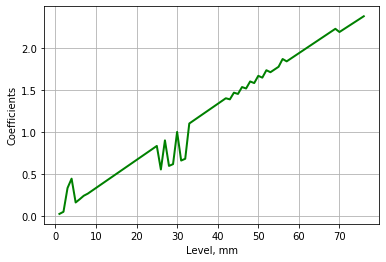

In [28]:
plot = plt.plot(X, y)
plt.setp(plot, color='g', linewidth=2.0)
plt.grid(True)
plt.xlabel('Level, mm')
plt.ylabel('Coefficients')
plt.show()

# Make an average delta

In [29]:
def coeff_avg(delta_coeffs):
    '''
    Make an average delta
    '''
    coeff_avg = 0
    sum = 0
    for mm, coeff in delta_coeffs.items():
        sum = sum + coeff
    coeff_avg = sum / len(delta_coeffs)
    print(f'Average coefficient is {coeff_avg}')
    
    return coeff_avg

In [30]:
avg_coeff = coeff_avg(delta_coeffs)
print(avg_coeff)

Average coefficient is 1.2358421430894053
1.2358421430894053


### Using average coefficient for 6mm, we get 5.664 mm. It's not very accurate.

In [31]:
# segment = find_segment(seg)
# coeff, delta = find_delta(segment, test_1, 6)
# print(delta * avg_coeff)

#### If we take the coefficient for 6mm, we get 6.0 mm. So, we shoud take the coefficient for every cluster according to it's height.

In [32]:
print('Using coefficient for cluster according to it height is much better: we get ' + str(delta * y[6]) + ' mm.')

Using coefficient for cluster according to it height is much better: we get 7.724137931034483 mm.


# Use Linear Ragression for making prediction

In [34]:
def simple_plot(x, y, y_regression, test_idx=None, prefix=''):
    plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
    plt.plot(x,y_regression);
    if test_idx is not None:
        plt.scatter(x[test_idx], y[test_idx], s=80, c ='b', edgecolors='k', linewidths=0.3);
    # plt.title('{} MSE = {}'.format(prefix, mean_squared_error(y, y_regression)));

In [35]:
def mean_squared_error(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

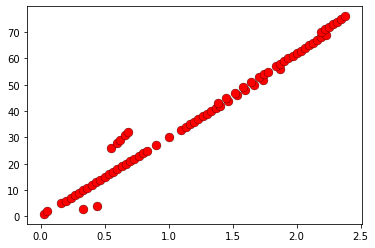

In [36]:
x_train = np.array([X]).T

y_train = np.array([y]).T

x_train, y_train = y_train, x_train
n_points = 10

plt.scatter(x_train, y_train, s=80, c ='r', edgecolors='k', linewidths=0.3);

### Linear fit

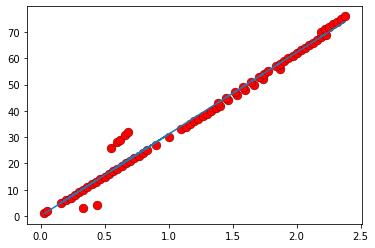

In [37]:
# Linear fit for our data

lr = linear_model.LinearRegression(fit_intercept=False)
lr.fit(x_train, y_train)
y_regression = lr.predict(x_train)

simple_plot(x_train, y_train, y_regression, prefix='Train')

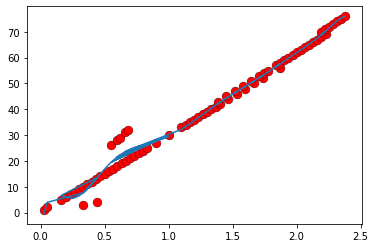

In [38]:
poly = make_pipeline(PolynomialFeatures(degree=10),
                    linear_model.LinearRegression(fit_intercept=False)
)

poly.fit(x_train, y_train)
y_regression = poly.predict(x_train)

simple_plot(x_train, y_train, y_regression, prefix='Train')

Загружаем фотки новые

In [39]:
for i in tqdm(range(len(files_kalibrovka))):
    im = Image.open(f'{path_kalibrovka}/{files_kalibrovka[i]}')   # print(f'path_kalibrovka = {self.photos_folder}/{image}')
    #image = image[i].split('.')[0]
    # print(f'{path_kalibrovka}{files_kalibrovka[i]}')
    if checkPhotosTurn == 1:
        im2 = im.transpose(Image.ROTATE_270)
        im2.save(path_kalibrovka + files_kalibrovka[i], "JPEG")

In [43]:
x_ = []
y_lr = []
y_poly = []
y_avg = []
for i in tqdm(range(len(#print(os.listdir(path))))):
    image = #print(os.listdir(path))[i]
    #print(image)
    test = plt.imread(path_kalibrovka + str(image))
    km_2, h_2, w_2 = kmeans_clustering(test, n=n_of_clusters)
    seg_2 = segmentation(km_2, h_2, w_2)
    segment_2 = find_segment(seg_2)
    coeff_2, delta_2 = find_delta(segment_2, test, i)
    x_pred =  np.array([[coeff_2]]).T
    x_.append(x_pred)
    y_pred1 = lr.predict(x_pred)
    y_lr.append(y_pred1[0][0])
    y_pred2 = poly.predict(x_pred)
    y_poly.append(y_pred2[0][0])
    # print(f'x_pred = {x_pred} y_pred1 = {y_pred1[0][0]} y_pred2 = {y_pred2[0][0]} mm')
    #avg_ypred = (float(y_pred2[0][0] + y_pred1[0][0]) / 2
    #y_avg.append(avg_ypred)

100%|██████████████████████| 76/76 [00:17<00:00,  4.82it/s]


In [51]:
# print(x_)
# print(y_lr)
# print(y_poly)
# print(y_avg)

In [45]:
X = []              # количество фоток * 5 = 100 * 5 = 500
for ml_ in range(1, len(files_kalibrovka)+1, 1): # *5, 5    # (0, число_фоток(шт)*интервал_(мин), интервал_(мин))   
    X.append(ml_)

In [50]:
print(X)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


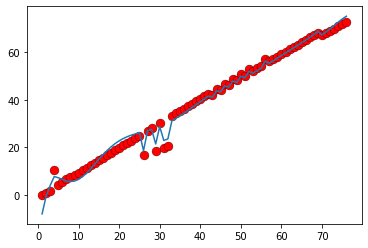

In [47]:
simple_plot(X, y_lr, y_poly, prefix='Train')

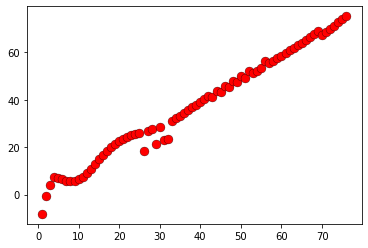

In [48]:
plt.scatter(X, y_poly, s=80, c ='r', edgecolors='k', linewidths=0.3);

In [49]:
import pandas as pd

path_xls = os.getcwd() + '/'
file_name = 'table'
data = {'Time, min.': X, 'Vol., ml.': y_poly}
data_df = pd.DataFrame(data=data)
data_df.to_csv(path_xls + file_name + '.csv')
data_df.to_excel(path_xls + file_name + '.xlsx')